# B"H

---


## Joint and Pair Plots

See:
- https://seaborn.pydata.org/generated/seaborn.jointplot.html
- https://seaborn.pydata.org/generated/seaborn.pairplot.html
---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/laz/repos/laz-main/edu/springboard/codebase
------------------------------
 
------------------------------
           src_dir            
/home/laz/repos/laz-main/edu/springboard/codebase/src
------------------------------
 


---
### Import Data

In [4]:
auto = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'auto-mpg.csv'    
)


auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [15]:
hp  = auto['hp'].values
mpg = auto['mpg'].values

---

## Joint Plots

---

### Plotting joint distributions - scatterplot with marginal histograms
- There are numerous strategies to visualize how pairs of ***continuous random variables*** vary jointly. 
- ***Regression*** and ***residual*** plots are one strategy. 
- Another is to visualize a ***bivariate distribution***.

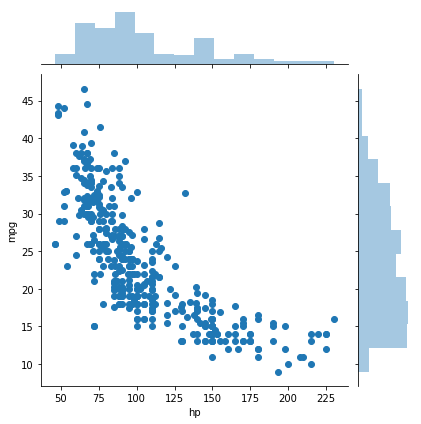

In [10]:
sns.jointplot(x='hp', y='mpg', data=auto)


plt.show()

---
### Plotting joint distributions notes
- The **`kind`** specifies how to visualize the joint variation of two continuous random variables
    - `kind = 'scatter' ` uses a scatter plot of the data points
    - `kind = 'reg'     ` uses a regression plot (default order 1)
    - `kind = 'resid'   ` uses a residual plot
    - `kind = 'kde'     ` uses a kernel density estimate of the joint distribution
    - `kind = 'hex'     ` uses a hexbin plot of the joint distribution

---

### Show with 2D hex-histogram and marginal histograms

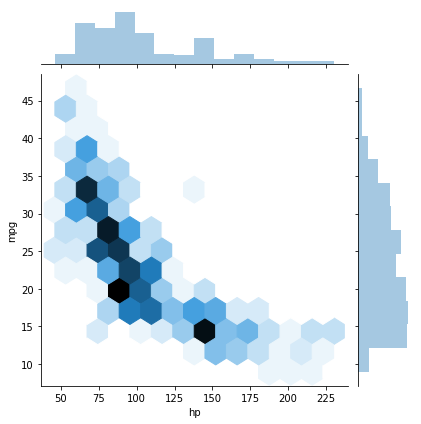

In [14]:
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

plt.show()

---

### Show with regression and kernel density fits

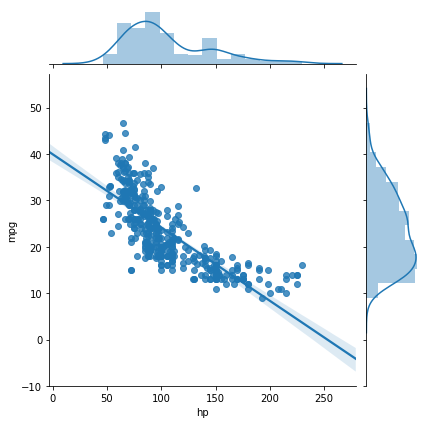

In [16]:
sns.jointplot(x='hp', y='mpg', data=auto, kind='reg')

plt.show()

---

## Pair Plots

---
### Plotting distributions pairwise
- Data sets often contain more than two ***continuous variables***. 
- ***Joint plots*** are restricted to representing joint variation between only ***two quantities*** 
- Visualizing multivariate relationships is trickier - ***Pair Plots*** helps us gain insight.
- Seaborn's pairplots are an excellent way of visualizing the relationship between all ***continuous variables*** in a dataset.
- Plots like this are why Seaborn is such a useful library: Using just one command, you're able to quickly extract a lot of valuable insight from a dataset.

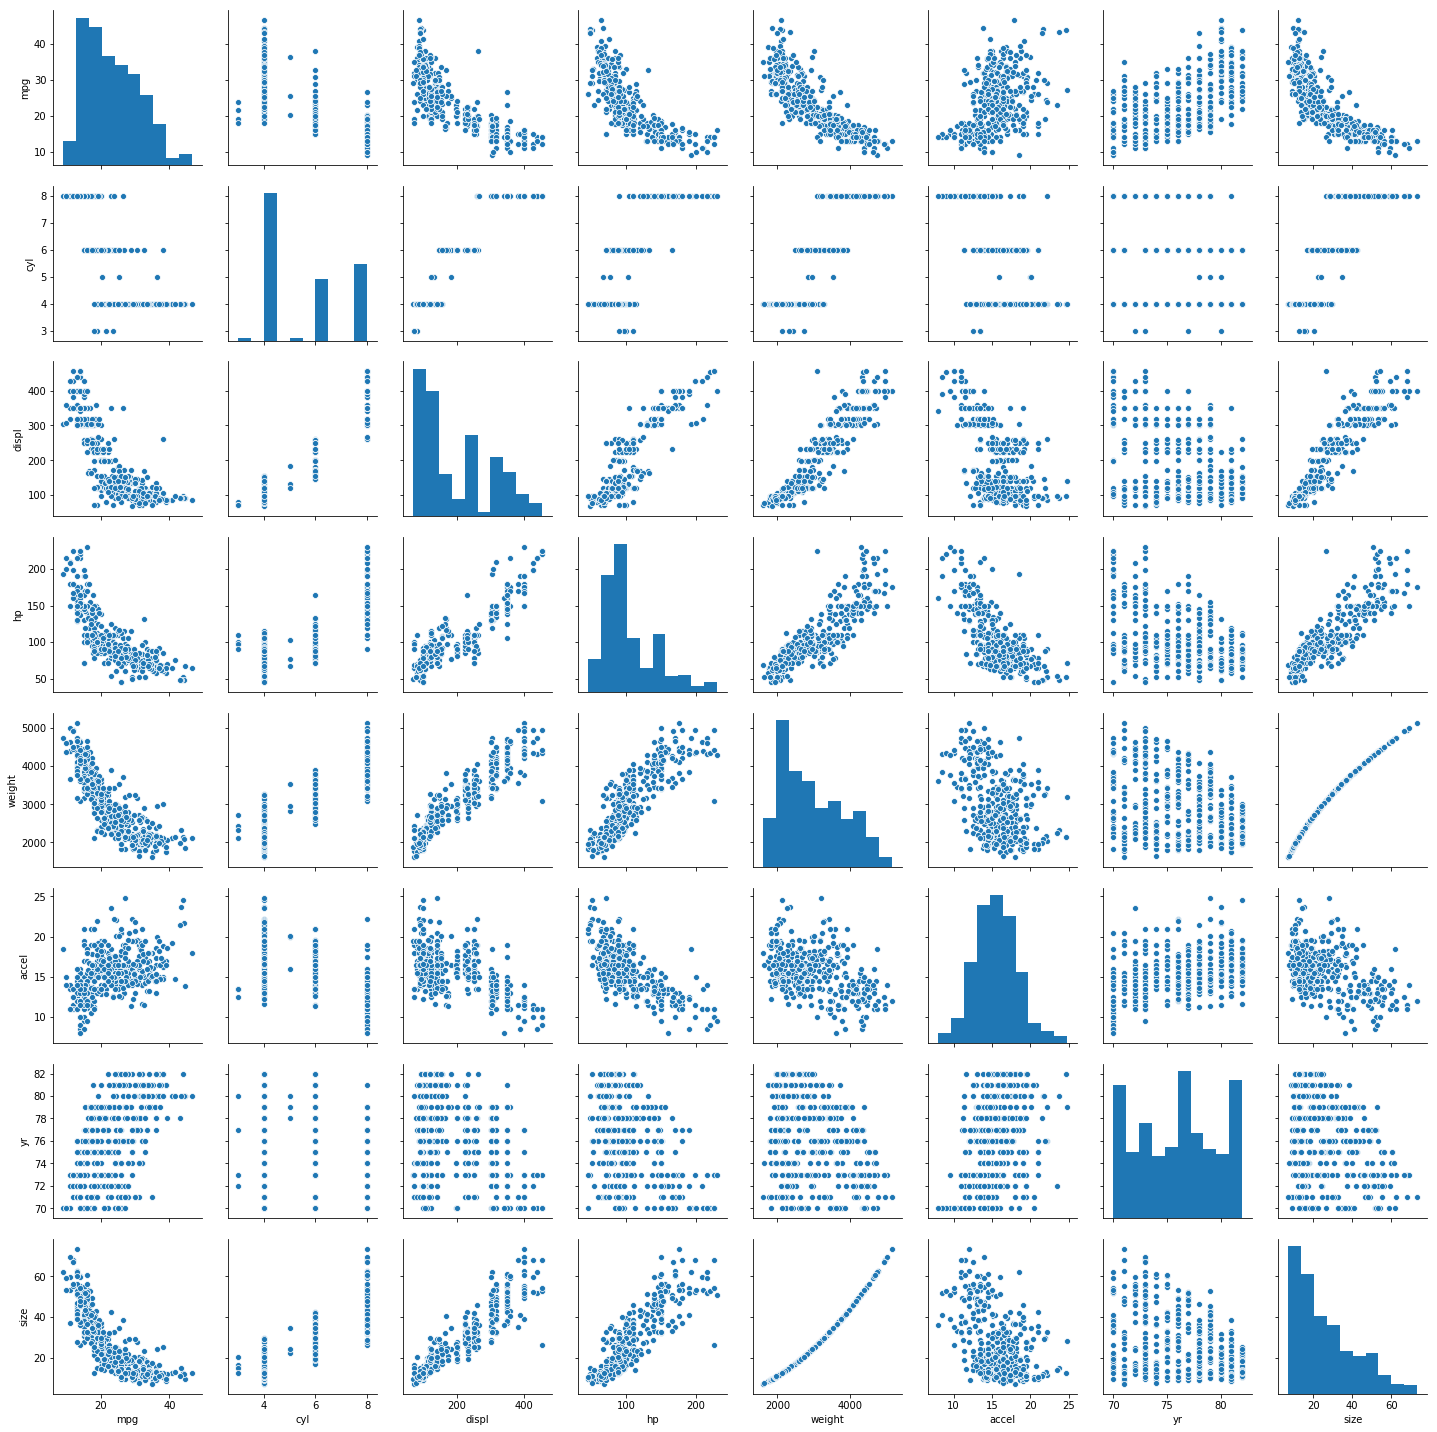

In [18]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(data = auto)

plt.show()

---

### Pair plot with hue and regression lines

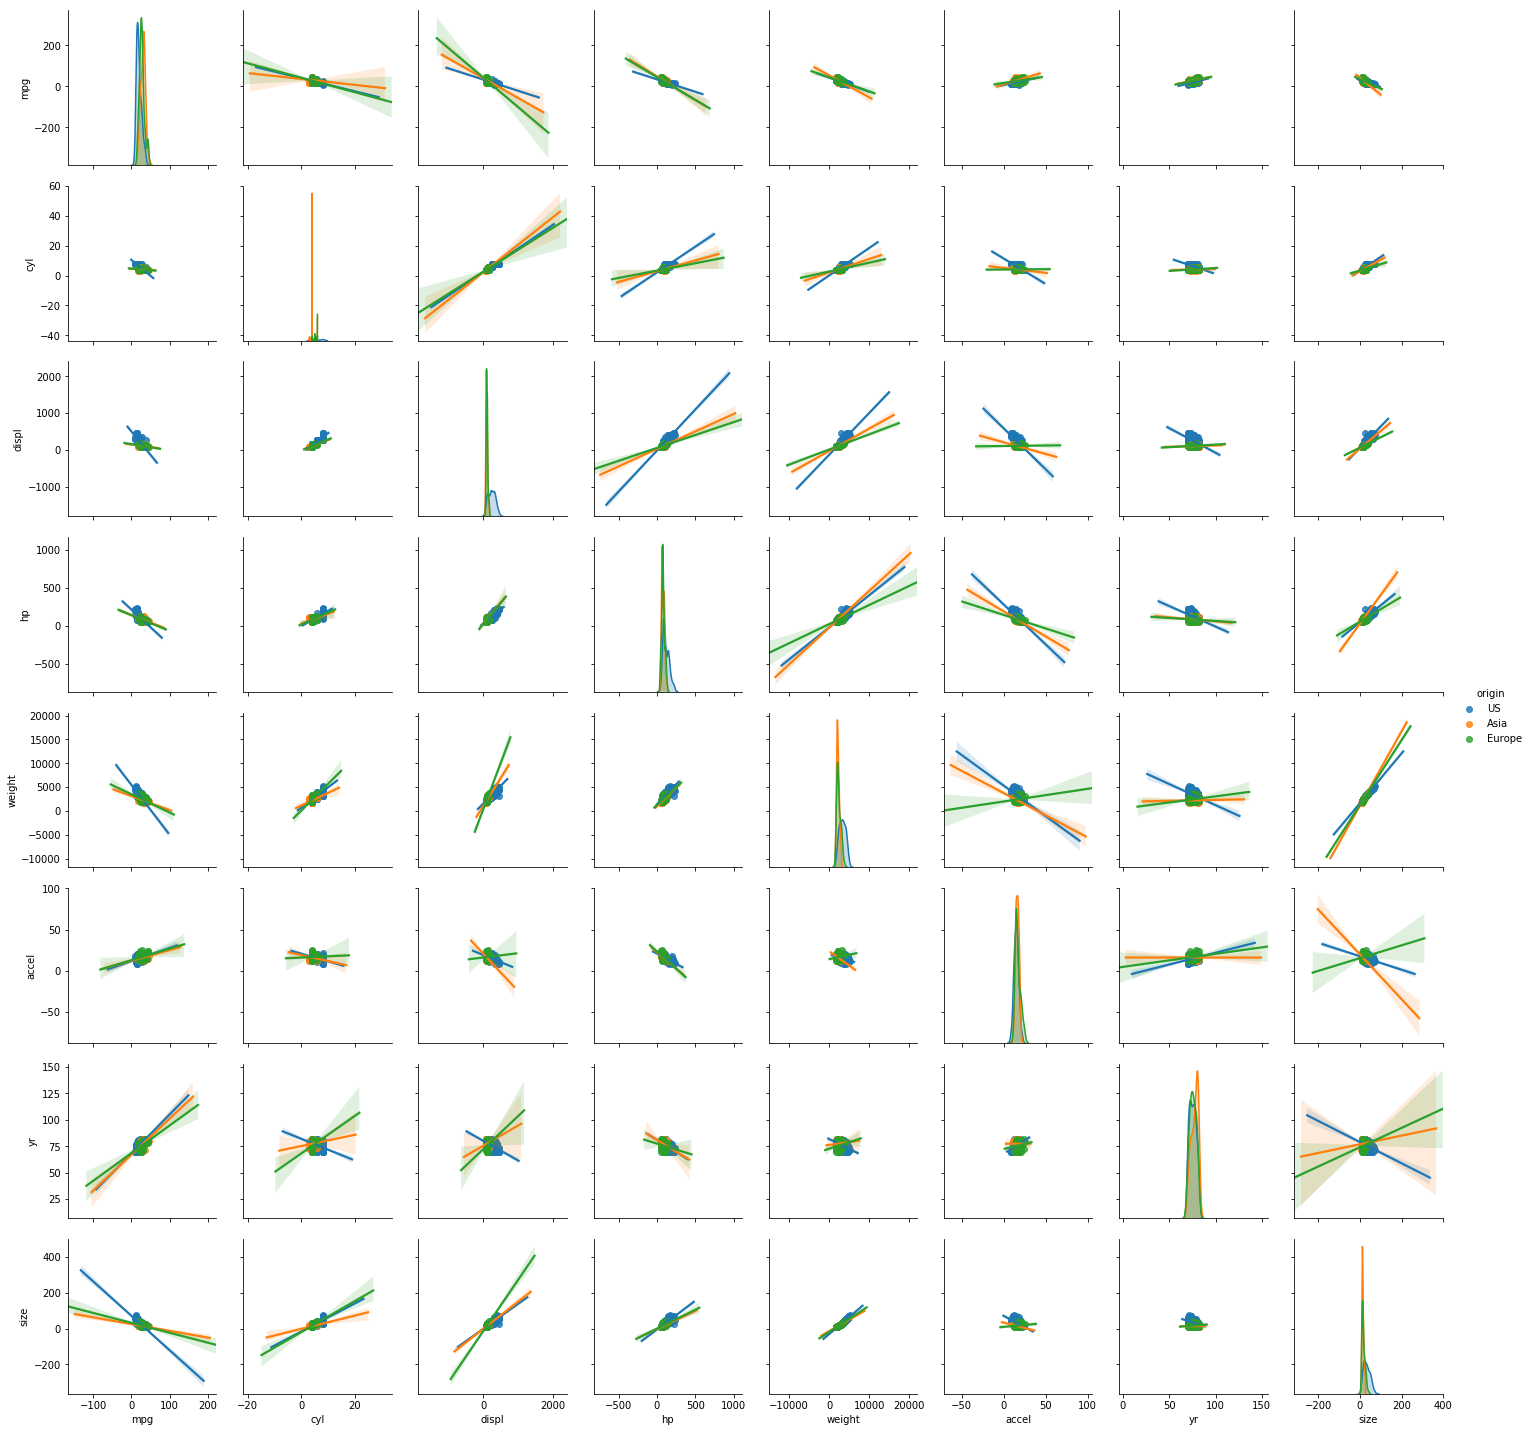

In [19]:
sns.pairplot(
    data = auto, 
    kind = 'reg', 
    hue  = 'origin'
)


plt.show()

---

### Pair plot with subset of variables

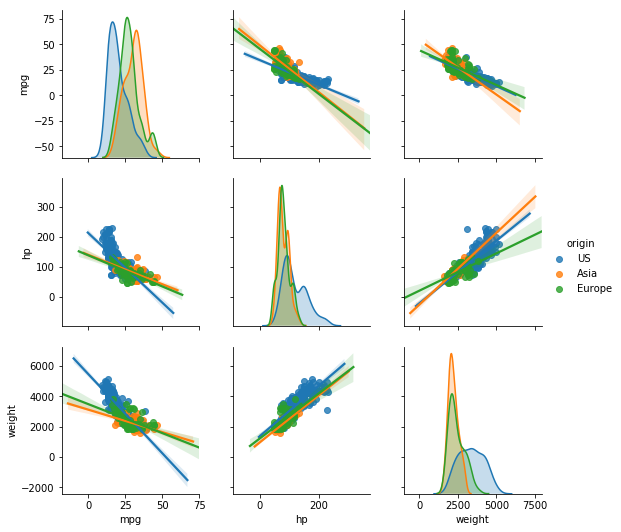

In [20]:
sns.pairplot(
    data = auto, 
    kind = 'reg', 
    hue  = 'origin',
    vars = ['mpg', 'hp', 'weight']
)


plt.show()